In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '../SOM-LVQ')
from minisom import MiniSom
import LVQ
from supervisedSom import supervisedSom
from SOM_LVQ import SOM_LVQ

In [2]:
data = pd.read_csv(r"../data/AReM/Dataset1(combined).csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==7] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
x_train.shape

(2520, 6)

In [4]:
som1 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 200)

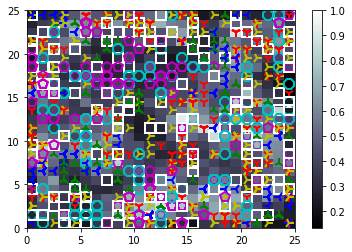

In [5]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [6]:
propa1 = suso1.propabilitySom()

taggings1 = suso1.taggingSom()

In [7]:
predicted_y1 = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.66      0.59      0.62       133
          1       0.93      0.97      0.95       115
          2       0.93      0.96      0.94       107
          3       0.53      0.56      0.54       120
          4       0.55      0.57      0.56       117
          5       0.64      0.71      0.67       119
          6       0.69      0.60      0.64       129

avg / total       0.70      0.70      0.70       840



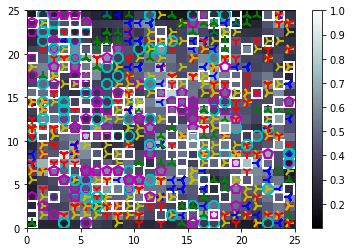

In [8]:
som2 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 200)
suso2 = supervisedSom(som2, x_train, y_train)

label2= suso2.visualSom()

In [9]:
propa2 = suso2.propabilitySom()

taggings2 = suso2.taggingSom()

In [10]:
predicted_y2 = [suso2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.64      0.50      0.57       133
          1       0.94      0.95      0.94       115
          2       0.94      0.93      0.94       107
          3       0.47      0.62      0.53       120
          4       0.50      0.50      0.50       117
          5       0.68      0.60      0.64       119
          6       0.60      0.64      0.62       129

avg / total       0.68      0.67      0.67       840



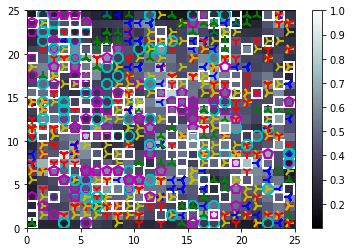

In [11]:
som3 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 200)
suso3 = supervisedSom(som2, x_train, y_train)

label3= suso3.visualSom()

In [12]:
propa3 = suso3.propabilitySom()

taggings3 = suso3.taggingSom()

In [13]:
predicted_y3 = [suso3.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.66      0.60      0.63       133
          1       0.95      0.87      0.91       115
          2       0.89      0.94      0.91       107
          3       0.49      0.52      0.50       120
          4       0.45      0.50      0.47       117
          5       0.75      0.65      0.70       119
          6       0.61      0.66      0.63       129

avg / total       0.68      0.67      0.67       840



In [14]:
mapping1 = som1.win_map(x_train)
mapping2 = som2.win_map(x_train)
mapping3 = som3.win_map(x_train)

In [15]:
result = np.array([])
for sample in x_test:
    pos1 = suso1.find_closest(sample)
    pos2 = suso2.find_closest(sample)
    pos3 = suso3.find_closest(sample)
    l1 = len(mapping1[pos1])
    l2 = len(mapping2[pos2])
    l3 = len(mapping3[pos3])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    pro1 = (l1*propa1[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa1[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa1[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa1[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    pro5 = (l1*propa1[4, pos1[0], pos1[1]] + l2*propa2[4, pos2[0], pos2[1]] + l3*propa3[4, pos3[0], pos3[1]])/(l1+l2+l3)
    pro6 = (l1*propa1[5, pos1[0], pos1[1]] + l2*propa2[5, pos2[0], pos2[1]] + l3*propa3[5, pos3[0], pos3[1]])/(l1+l2+l3)
    pro7 = (l1*propa1[6, pos1[0], pos1[1]] + l2*propa2[6, pos2[0], pos2[1]] + l3*propa3[6, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4, pro5, pro6, pro7]))
    result = np.append(result, tmp)

In [16]:
from sklearn.metrics import classification_report

print (classification_report(y_test, result, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.67      0.72      0.70       133
          1       0.94      0.98      0.96       115
          2       0.94      0.97      0.95       107
          3       0.58      0.59      0.58       120
          4       0.62      0.56      0.59       117
          5       0.78      0.71      0.75       119
          6       0.74      0.74      0.74       129

avg / total       0.75      0.75      0.75       840

